### 1. Data Overview

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [91]:
# load data
data = pd.read_csv("student_data.csv")

data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [93]:
data.shape

(395, 33)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [97]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### 2. Data Quality

In [100]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [102]:
# duplicated check
data.duplicated().sum()

0

In [104]:
# Check unique values in each column
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [106]:
# Outlier Detection
numeric_data = data.select_dtypes(include=['float64', 'int64']) # 选出所有numeric列

# Detect outliers using the IQR method
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR)))

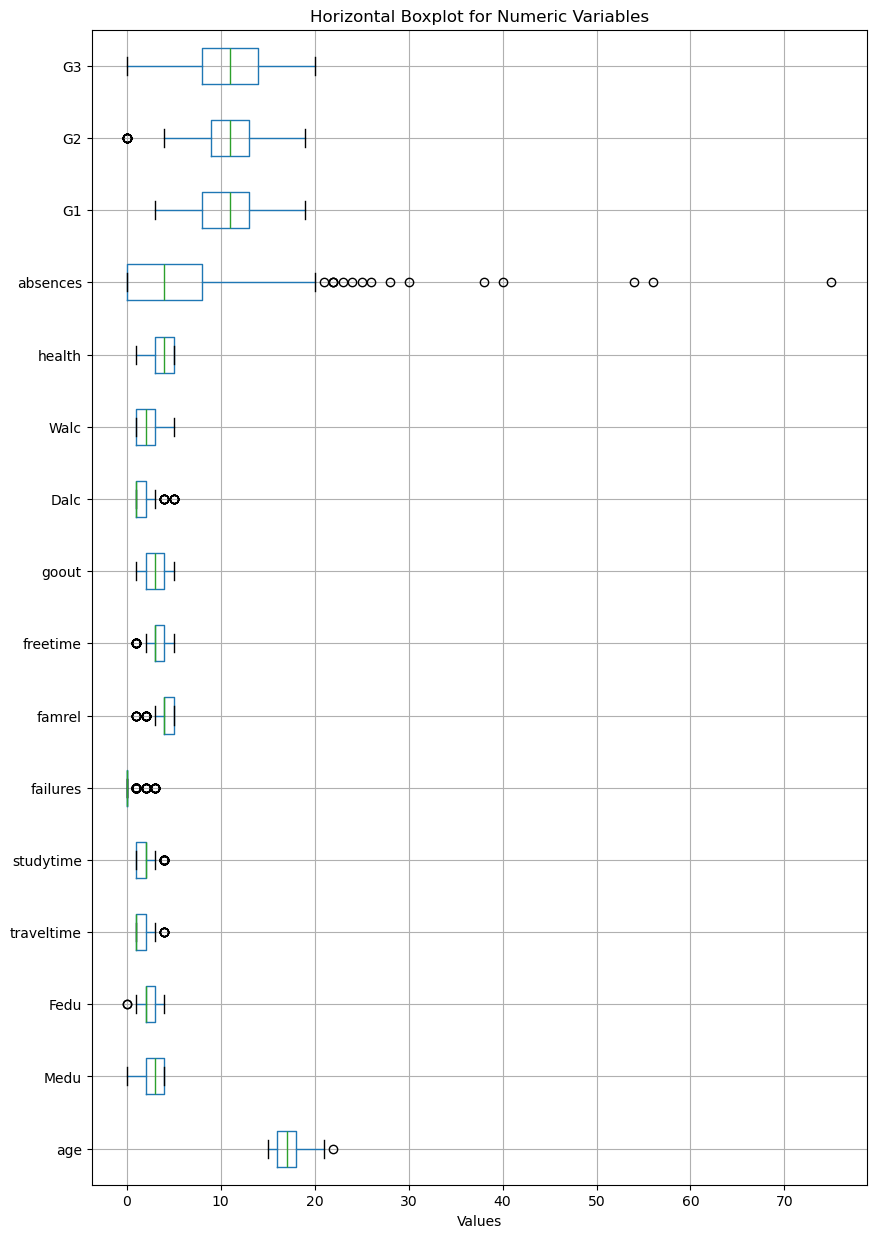

In [108]:
plt.figure(figsize=(10, 15))
numeric_data.boxplot(vert=False)
plt.yticks(rotation=0)
plt.title("Horizontal Boxplot for Numeric Variables")
plt.xlabel("Values")
plt.grid(True)
plt.show()

### 3. One variable analysis
#### numerical variable

In [110]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


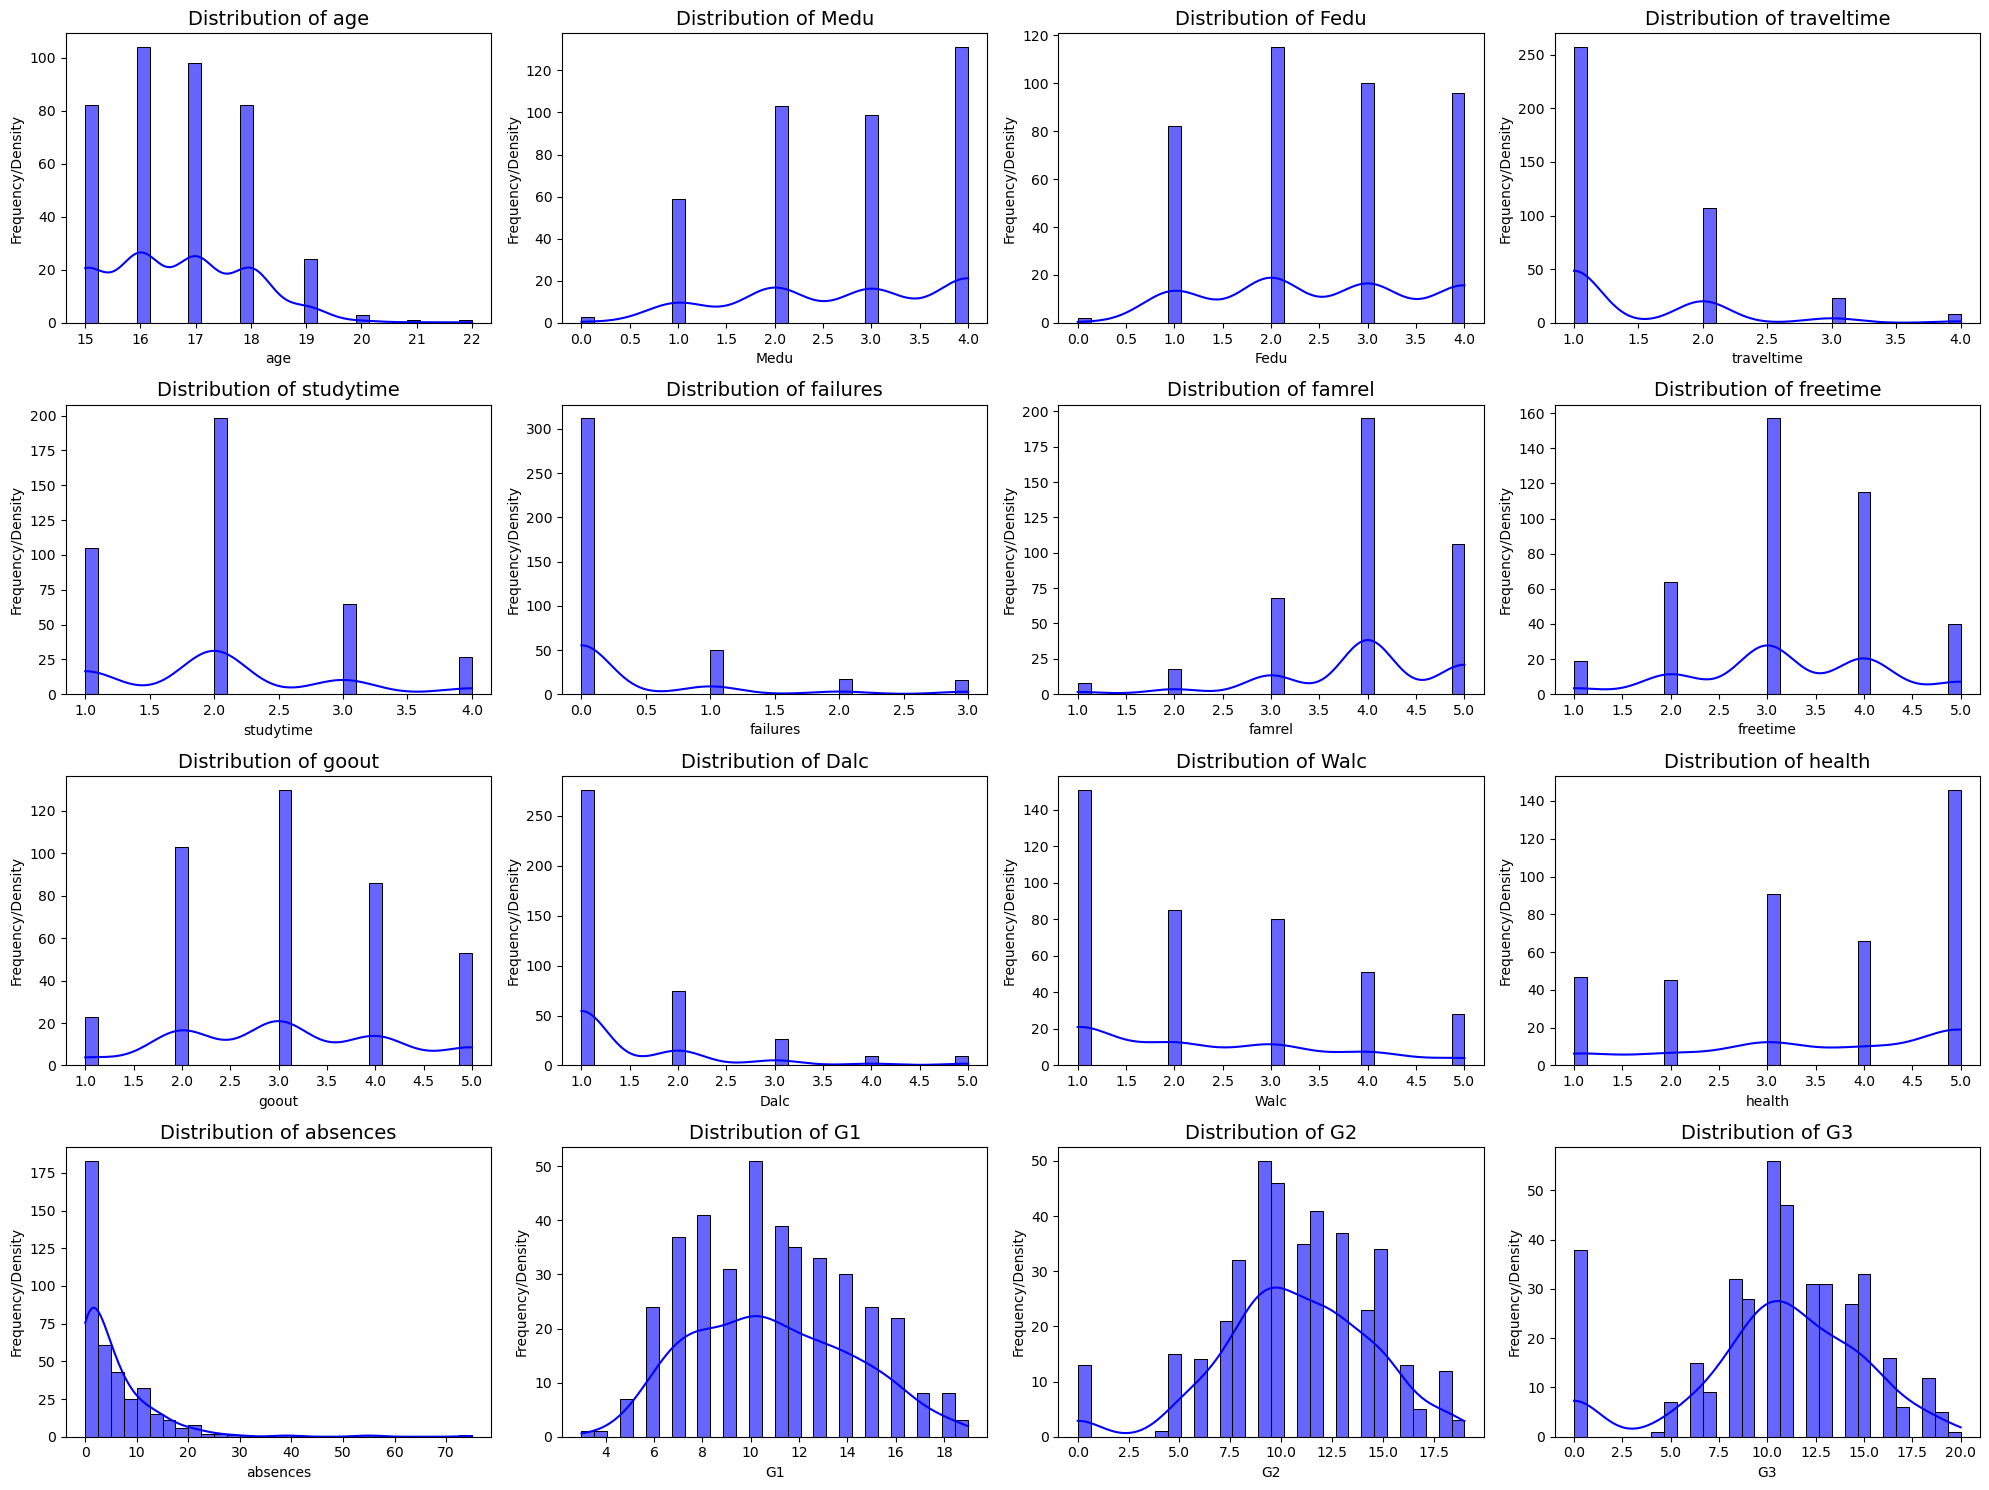

In [14]:
# Plot histograms for all numerical columns

fig, axes = plt.subplots(4, 4, figsize=(20, 15)) 
axes = axes.flatten() 

for i, col in enumerate(numeric_data.columns):
    sns.histplot(data[col], kde=True, bins=30, color='blue', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency/Density', fontsize=10)

plt.tight_layout() 
plt.show()

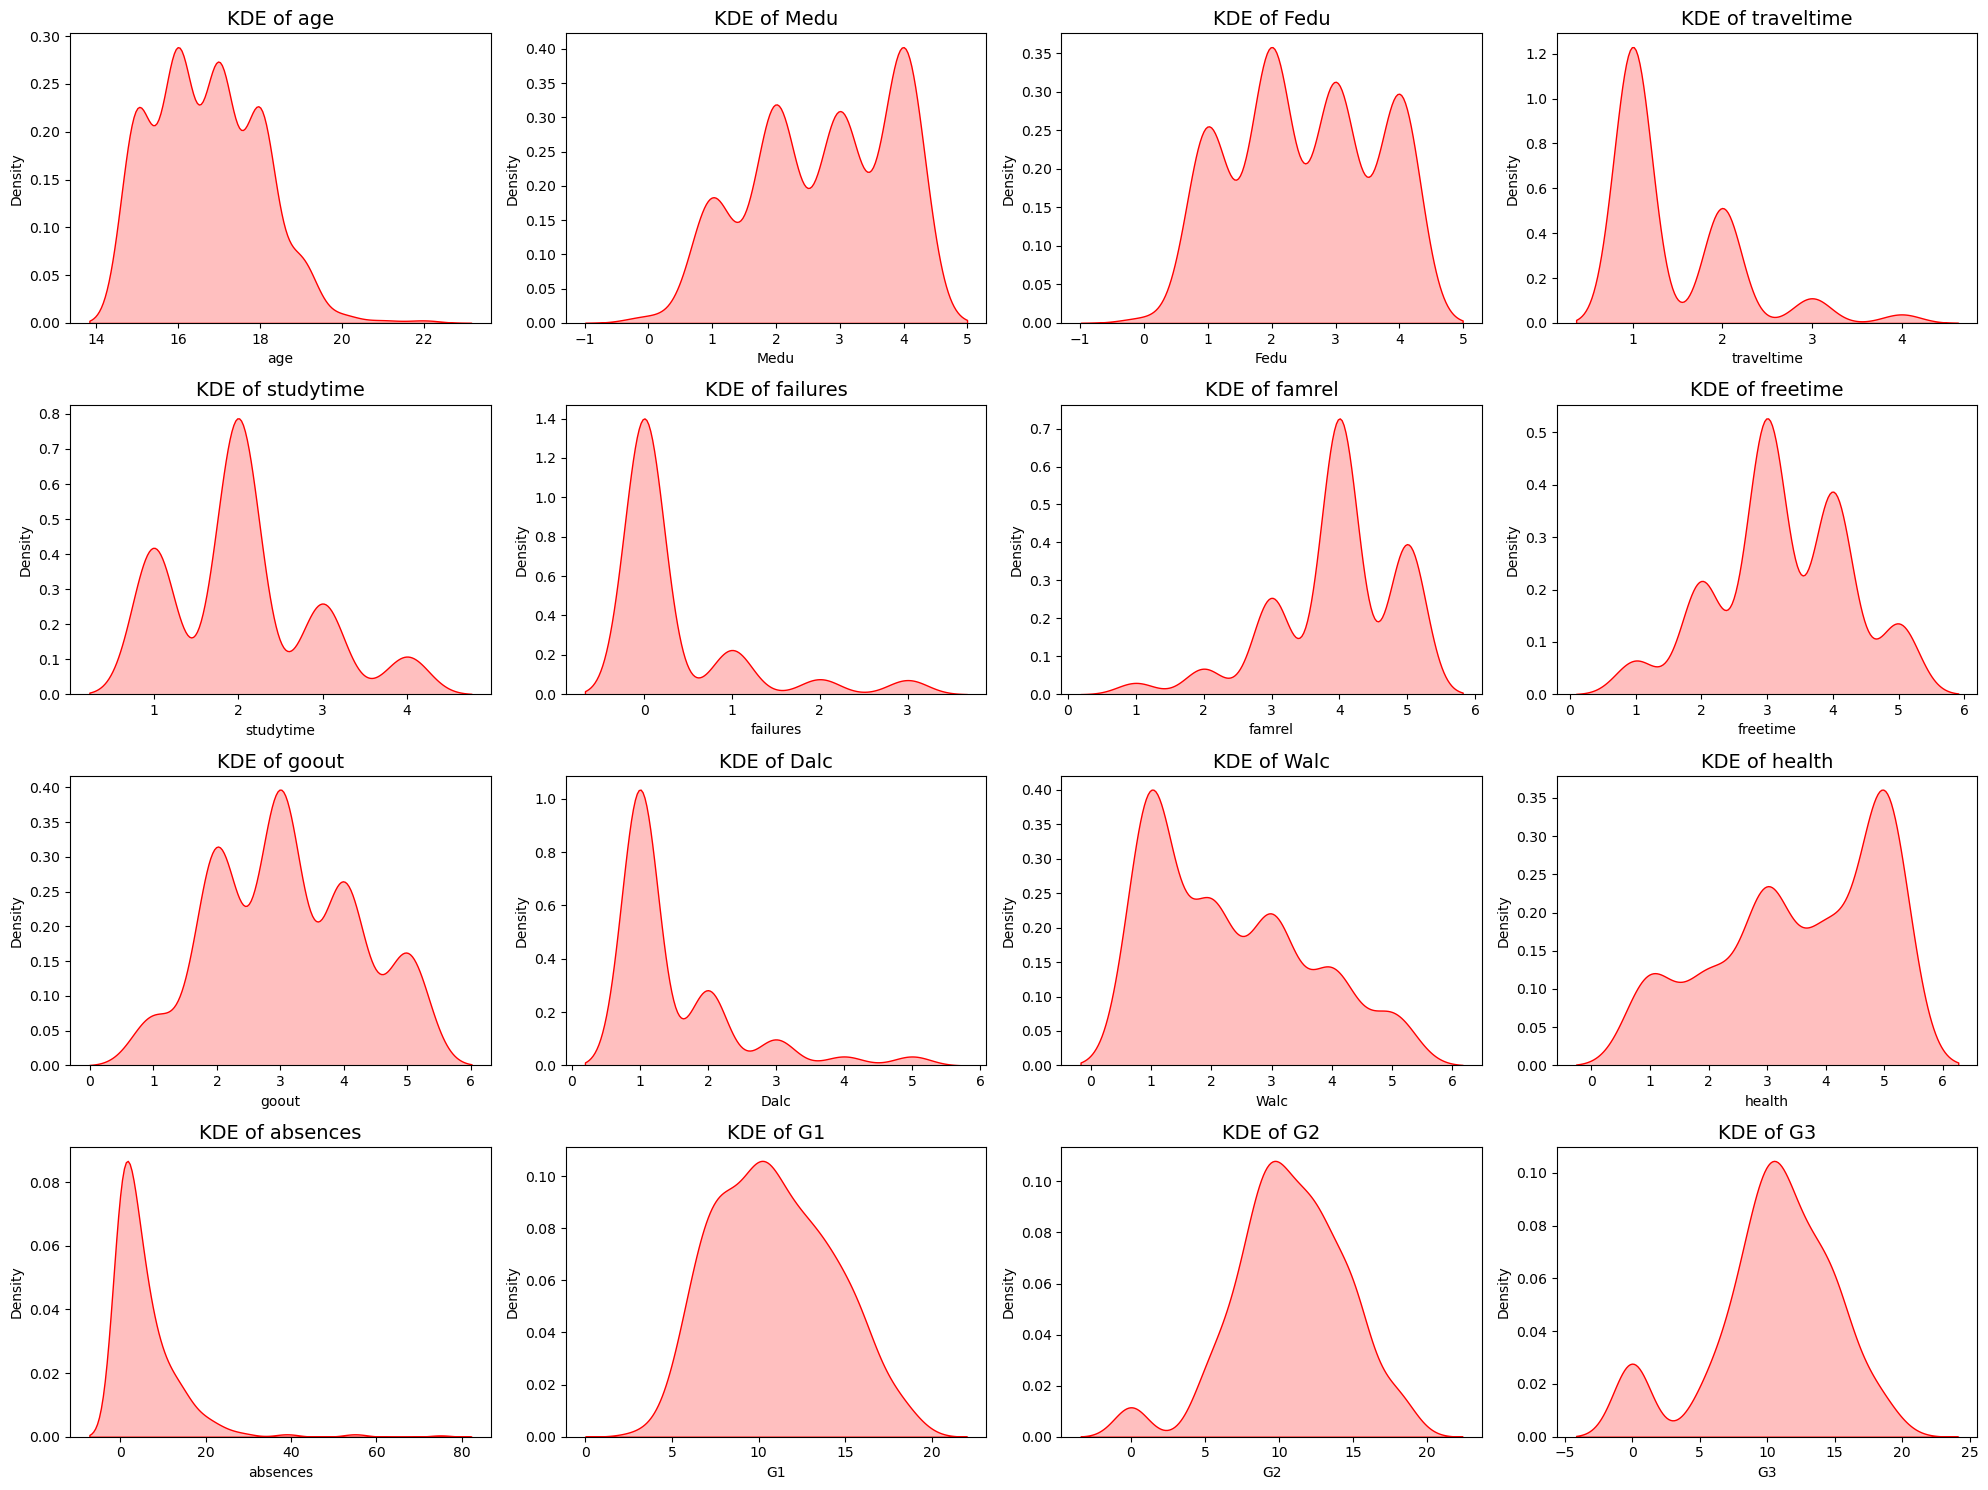

In [15]:
# KDA(Kernel Density Estimate plot) plot for all numerical columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(4, 4, figsize=(20, 15)) 
axes = axes.flatten() 

for i, col in enumerate(numeric_data.columns):
    sns.kdeplot(numeric_data[col], color='red', fill=True, ax=axes[i])
    axes[i].set_title(f'KDE of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)

plt.tight_layout()  
plt.show()


#### categories variable

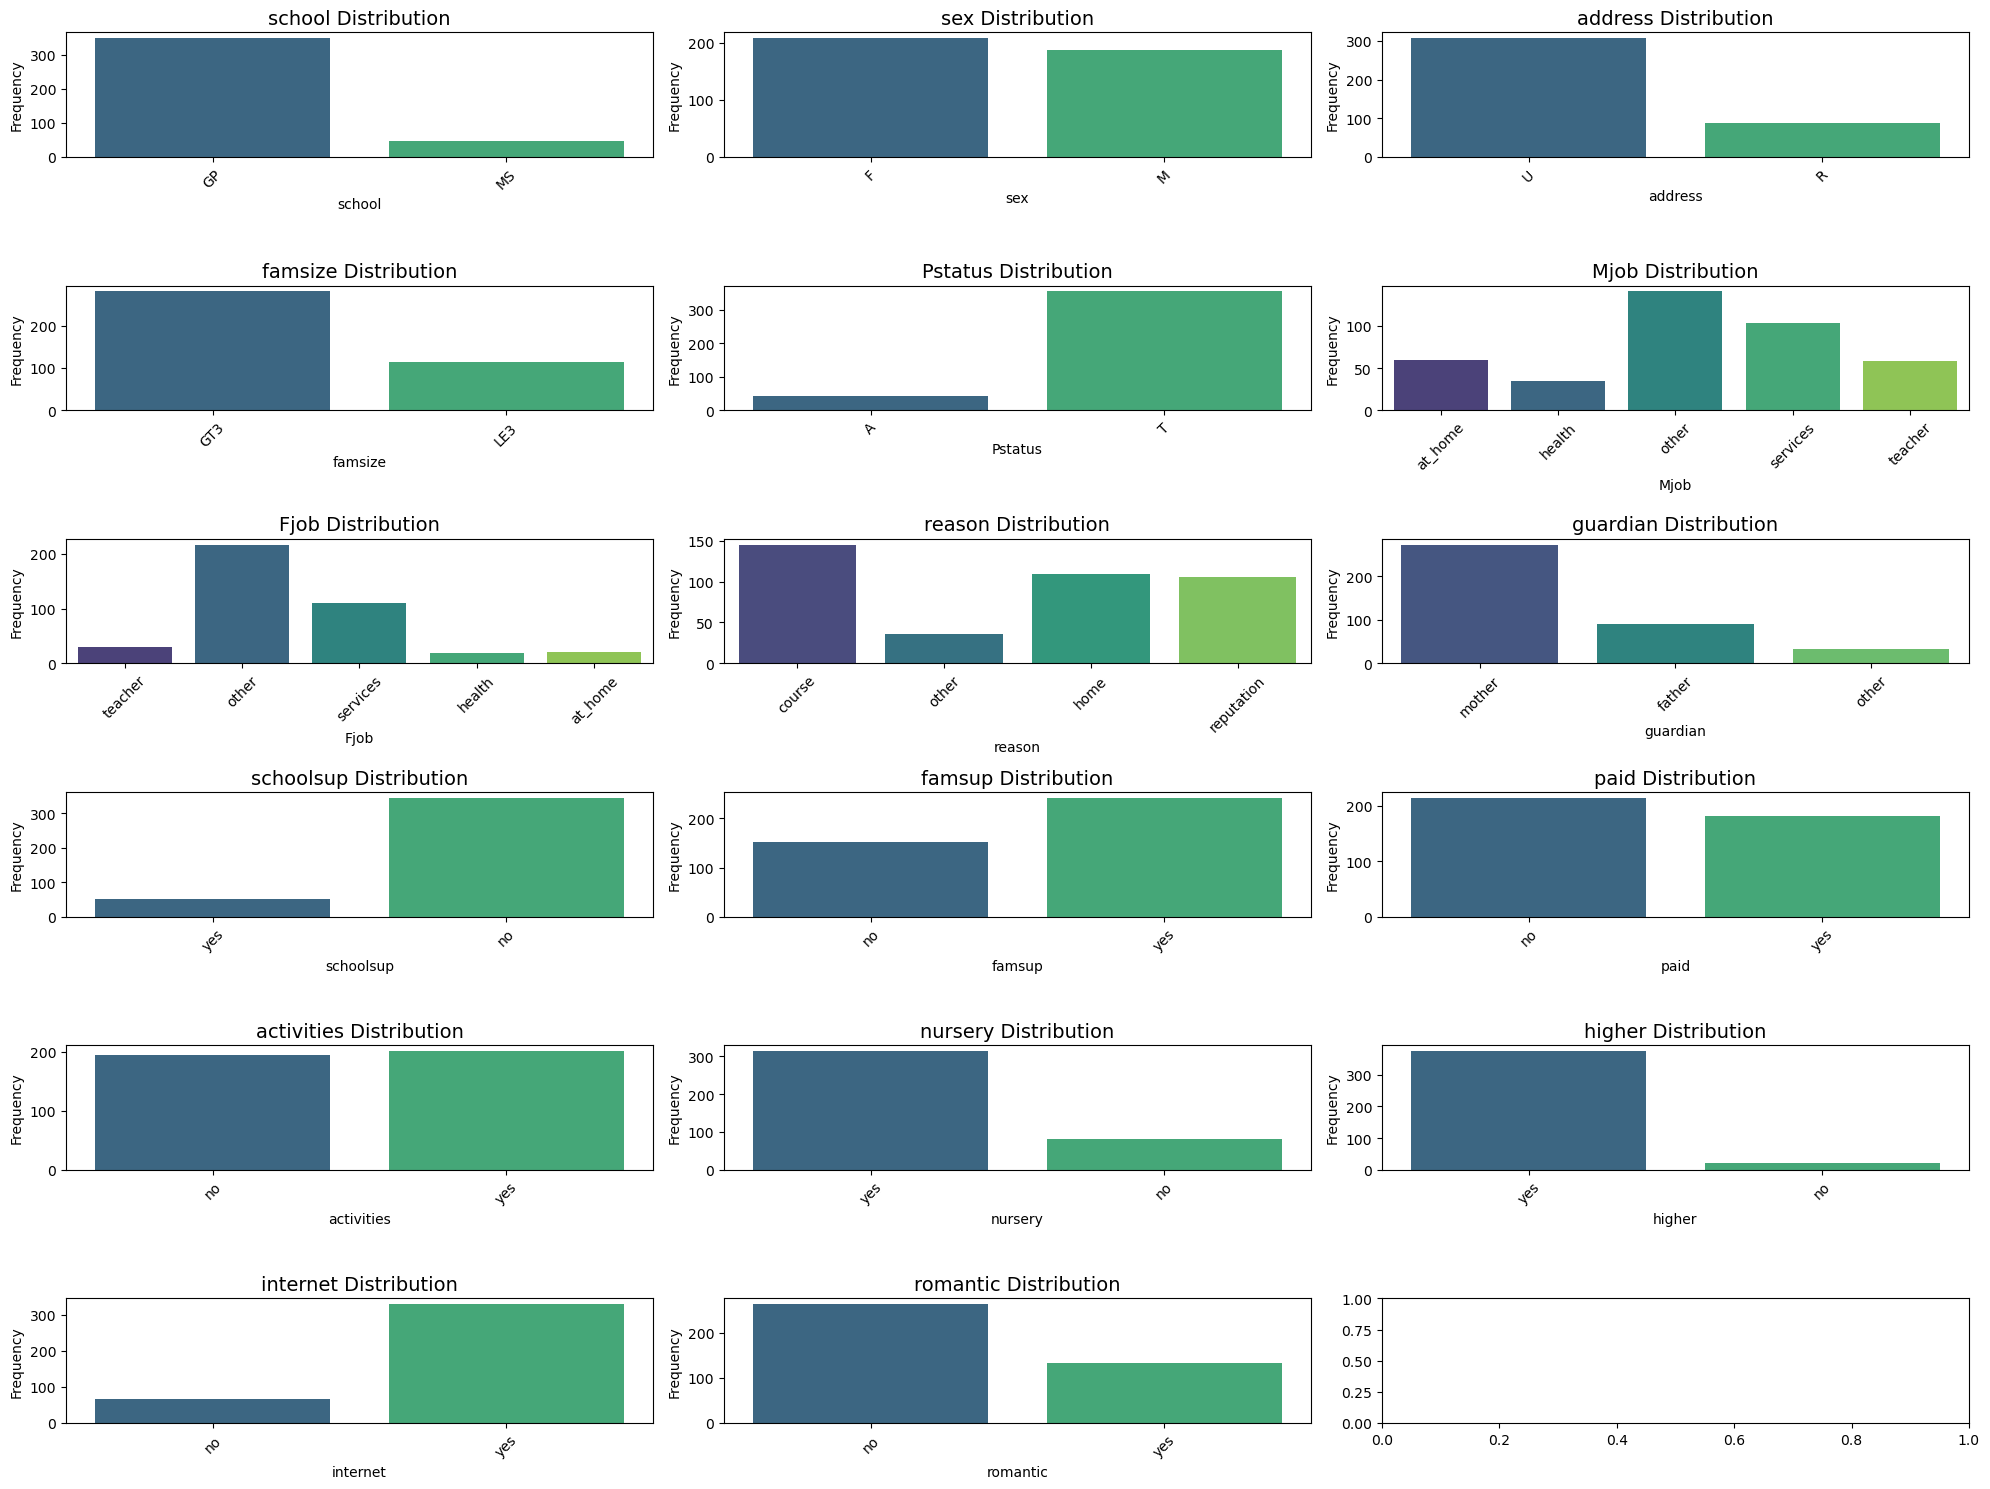

In [17]:
categorical_cols = data.select_dtypes(include=['object', 'category'])
warnings.filterwarnings("ignore", category=FutureWarning)

fig, axes = plt.subplots(6, 3, figsize=(20, 15))
axes = axes.flatten() 

for i, col in enumerate(categorical_cols):
    if i < len(axes): 
        sns.countplot(data=data, x=col, palette="viridis", ax=axes[i])
        axes[i].set_title(f'{col} Distribution', fontsize=14)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()


### 4. Multivariate analysis

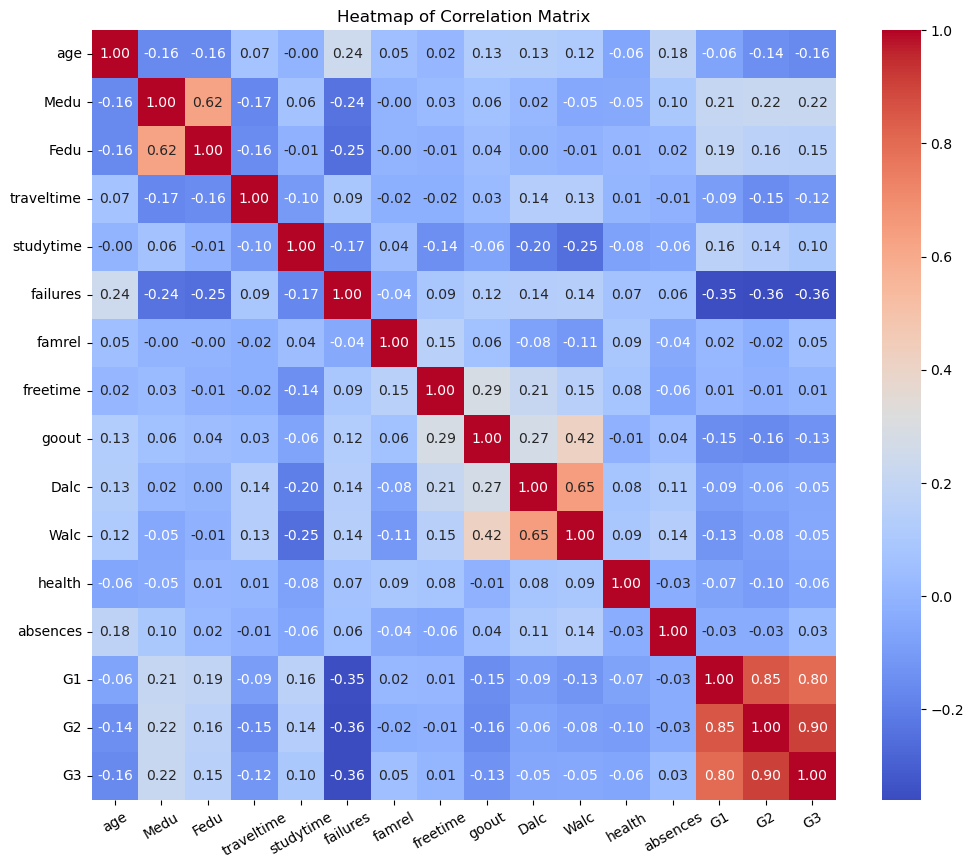

In [24]:
# heatmap
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xticks(rotation=30)
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [123]:
X = numeric_data.drop(columns=['G3'], errors='ignore')  
y = numeric_data['G3'] 

def forward_selection(X, y, max_features=6, criterion='aic'):
    selected_features = []
    remaining_features = list(X.columns)
    current_score, best_new_score = np.inf, np.inf

    while remaining_features and len(selected_features) < max_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            features_to_test = selected_features + [candidate]
            X_candidate = X[features_to_test]
            X_candidate = sm.add_constant(X_candidate)
            model = sm.OLS(y, X_candidate).fit()
            if criterion == 'aic':
                score = model.aic
            elif criterion == 'bic':
                score = model.bic
            else:
                raise ValueError("Criterion should be either 'aic' or 'bic'")
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        remaining_features.remove(best_candidate)
        selected_features.append(best_candidate)
        current_score = best_new_score
    return selected_features

In [127]:
selected_features_aic = forward_selection(X, y, max_features=7, criterion='aic')
print("AIC 选择的特征:", selected_features_aic)

selected_features_bic = forward_selection(X, y, max_features=7, criterion='bic')
print("BIC 选择的特征:", selected_features_bic)

使用 AIC 选择的特征: ['G2', 'famrel', 'absences', 'G1', 'age', 'Walc', 'failures']
使用 BIC 选择的特征: ['G2', 'famrel', 'absences', 'G1', 'age', 'Walc', 'failures']


In [145]:
# coef（估计值）：每个变量的回归系数，表示该变量对 G3 的影响程度。
# std err：估计值的标准误差。
# t：t 统计量，用于检验系数的显著性。
# P>|t|（p 值）：p 值用于判断估计值是否在统计上显著。一般来说，p 值小于 0.05 表示统计显著。
# [0.025 0.975]（置信区间）：95% 置信区间
selected_features = ['famrel', 'absences', 'age', 'Walc']

X_selected = X[selected_features]

X_selected = sm.add_constant(X_selected)

model = sm.OLS(y, X_selected).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.574
Date:                Sun, 24 Nov 2024   Prob (F-statistic):            0.00706
Time:                        14:29:35   Log-Likelihood:                -1154.1
No. Observations:                 395   AIC:                             2318.
Df Residuals:                     390   BIC:                             2338.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6460      3.129      6.279      0.0

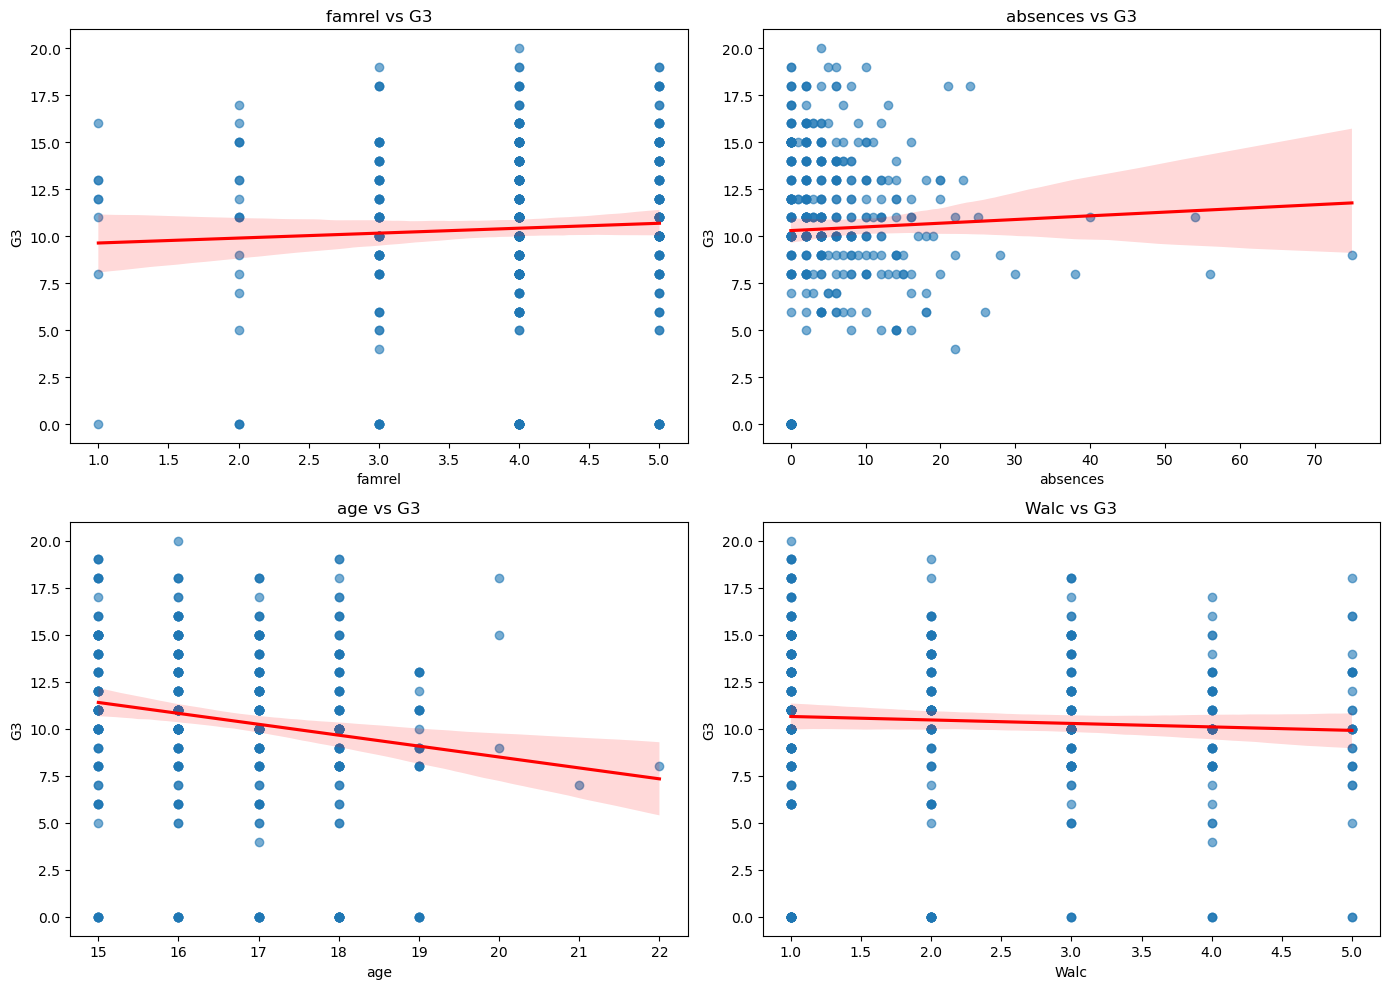

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
columns = ['famrel', 'absences', 'age', 'Walc']
titles = [f'{col} vs G3' for col in columns]

for i, ax in enumerate(axes.flat):
    sns.regplot(
        x=columns[i], y='G3', data=data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ax=ax
    )
    ax.set_title(titles[i])
    ax.set_xlabel(columns[i])
    ax.set_ylabel('G3')

plt.tight_layout()
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np


# 分离特征和目标变量
X = data.drop(columns=['G3'])  # 特征
y = data['G3']  # 目标变量

# 确定数值和分类特征
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 数据预处理管道
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # 填补数值缺失值
    ('scaler', StandardScaler())                 # 标准化
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # 填补分类缺失值
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # 独热编码
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 将预处理应用于数据集
X_preprocessed = preprocessor.fit_transform(X)

# 数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


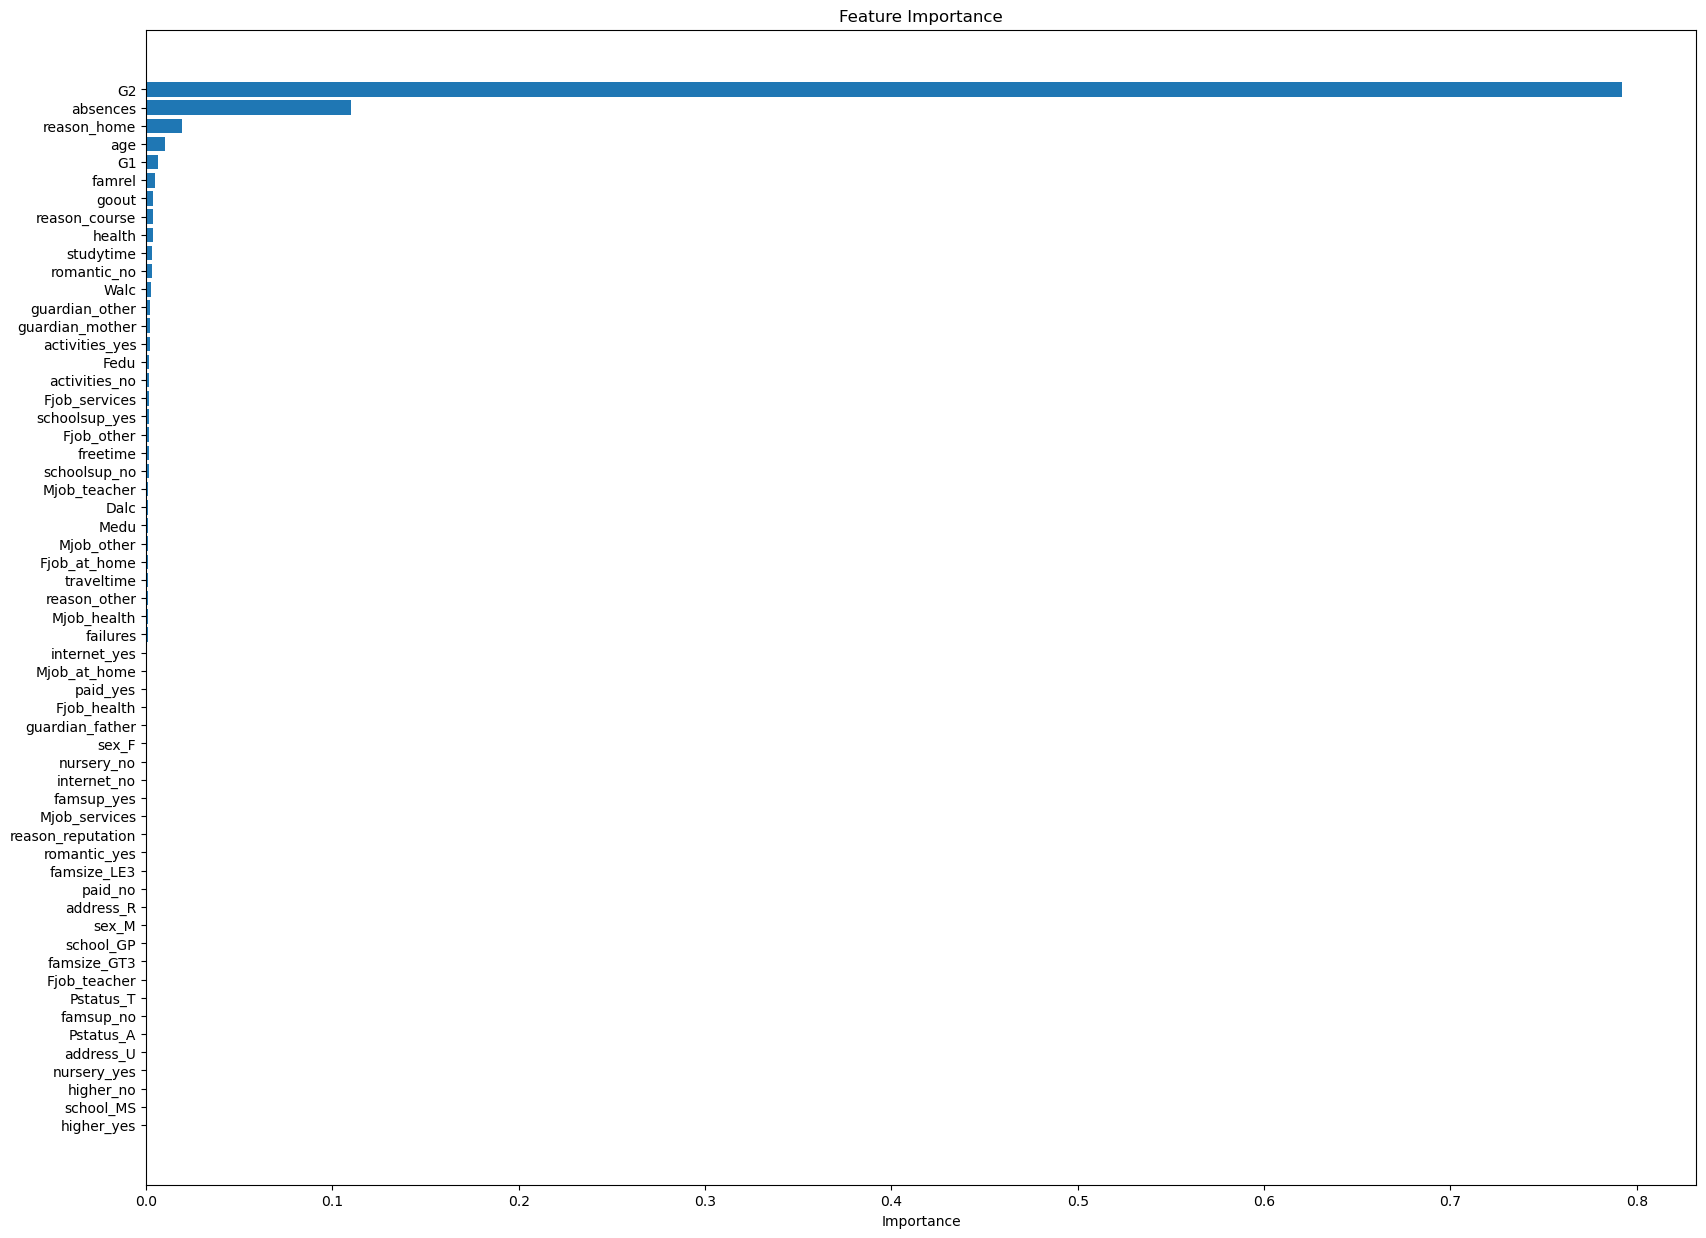

          Feature  Importance
14             G2    0.792268
12       absences    0.109791
36    reason_home    0.019529
0             age    0.010111
13             G1    0.006149
6          famrel    0.004639
8           goout    0.003959
35  reason_course    0.003772
11         health    0.003525
4       studytime    0.003310


In [62]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 训练随机森林模型
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# 提取特征重要性
feature_importances = rf.feature_importances_

# 显示特征重要性
feature_names = numeric_features.tolist() + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(20, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

# 输出前10重要特征
print(importance_df.head(10))


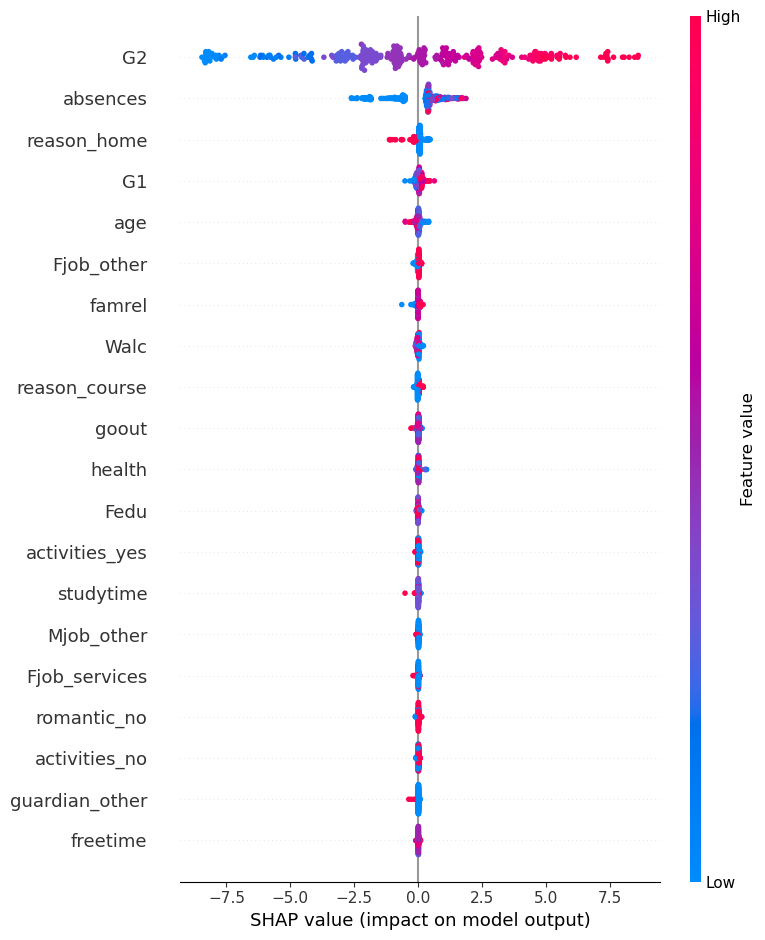

In [66]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, feature_names=feature_names)

In [85]:
student_data_encoded = pd.DataFrame(X_preprocessed, columns=feature_names)
student_data_encoded['G3'] = y.values

correlation_matrix = student_data_encoded.corr()
g3_correlation = correlation_matrix['G3'].sort_values(ascending=False)

print(g3_correlation.head(10))

G3             1.000000
G2             0.904868
G1             0.801468
Medu           0.217147
higher_yes     0.182465
Fedu           0.152457
romantic_no    0.129970
Mjob_health    0.116158
address_U      0.105756
sex_M          0.103456
Name: G3, dtype: float64


In [137]:
X = numeric_data.drop(columns=['G3'], errors='ignore')  
y = numeric_data['G3']  

X = sm.add_constant(X)

aic_bic_results = []
for col in X.columns[1:]: 
    sub_model = sm.OLS(y, sm.add_constant(X[col])).fit()
    aic_bic_results.append({'Variable': col, 'AIC': sub_model.aic, 'BIC': sub_model.bic})

aic_bic_df = pd.DataFrame(aic_bic_results).sort_values(by=['AIC', 'BIC']).reset_index(drop=True)

print(aic_bic_df)

      Variable          AIC          BIC
0           G2  1651.660740  1659.618512
1           G1  1920.211075  1928.168847
2     failures  2271.388546  2279.346318
3         Medu  2307.272294  2315.230065
4          age  2315.901540  2323.859312
5         Fedu  2317.061765  2325.019536
6        goout  2319.323772  2327.281544
7   traveltime  2320.893351  2328.851123
8    studytime  2322.553345  2330.511116
9       health  2324.862411  2332.820183
10        Dalc  2325.169261  2333.127033
11        Walc  2325.284148  2333.241920
12      famrel  2325.307710  2333.265482
13    absences  2325.887618  2333.845390
14    freetime  2326.300672  2334.258443


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
columns = ['failures', 'Medu', 'age', 'Fedu']
titles = [f'{col} vs G3' for col in columns]

for i, ax in enumerate(axes.flat):
    sns.regplot(
        x=columns[i], y='G3', data=data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ax=ax
    )
    ax.set_title(titles[i])
    ax.set_xlabel(columns[i])
    ax.set_ylabel('G3')

plt.tight_layout()
plt.show()